In [1]:
import sys
sys.path.append('..')

In [2]:
from optimization import *
from oracles import *
from plot_trajectory_2d import *

In [3]:
def make_experiment(oracle, x_0, levels=None, line_search_tool=None):
    [x_star, msg, history] = gradient_descent(oracle, x_0=x_0, trace=True, line_search_options=line_search_tool)
    if msg == "success":
        plot_levels(oracle.func, levels=levels)
        plot_trajectory(oracle.func, history['x'])
        show()
    else:
        print(msg)

Wolfe with x_0 = [25.   5.5]


/home/nikita/study/6-semester/optimization-methods/optimization-methods/hw1/jupyter-notebooks/../plot_trajectory_2d.py:30: UserWarning: The following kwargs were not used by contour: 'linewidth'
  CS = plt.contour(X, Y, Z, levels=levels, colors='k', linewidth=4.0)


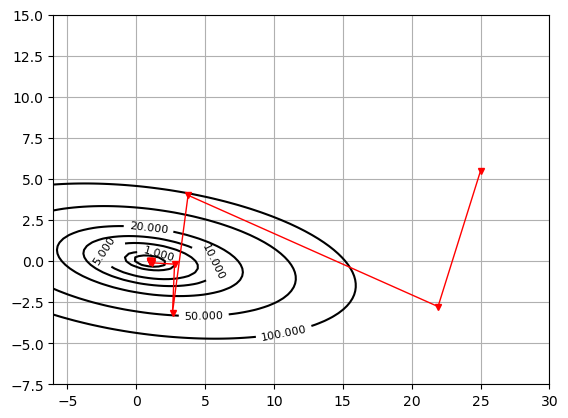

Armijo


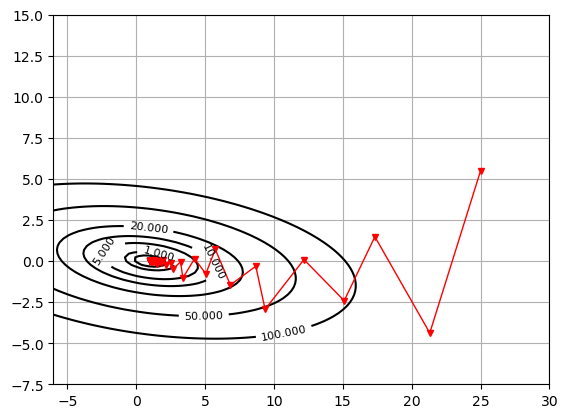

Constant


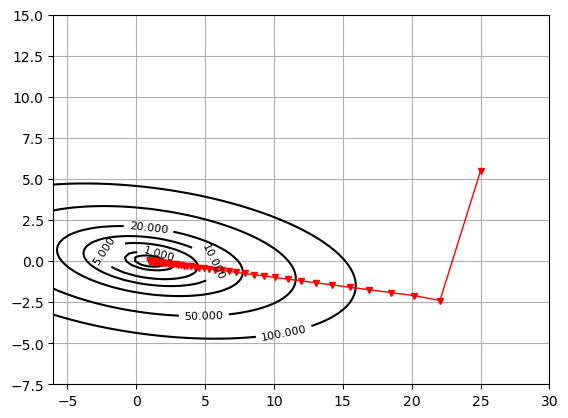

Wolfe with x_0 = [5 5]


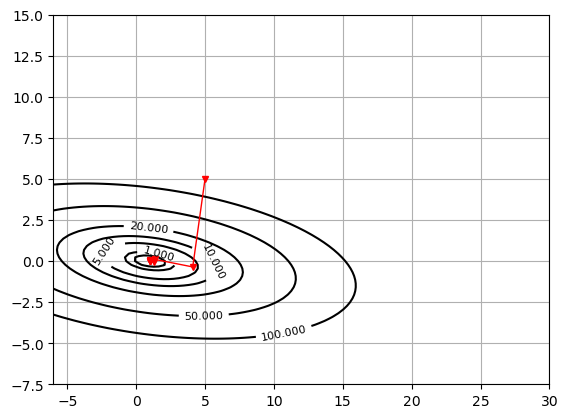

Armijo


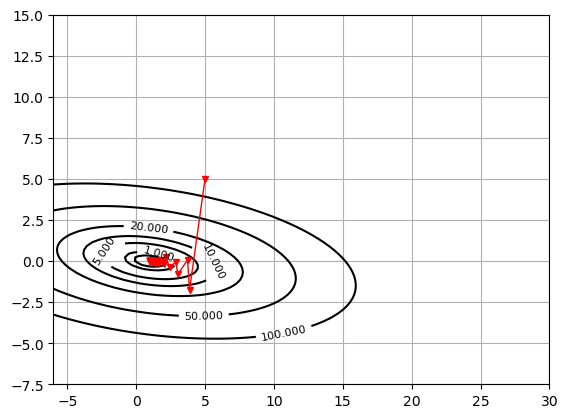

Constant


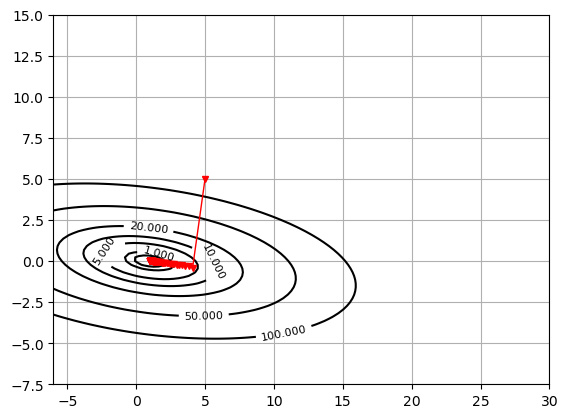

Wolfe with x_0 = [25 -3]


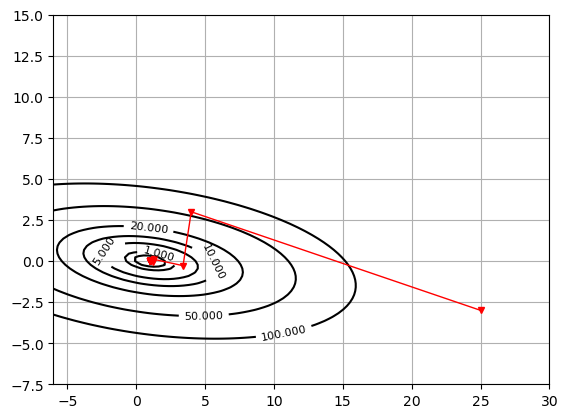

Armijo


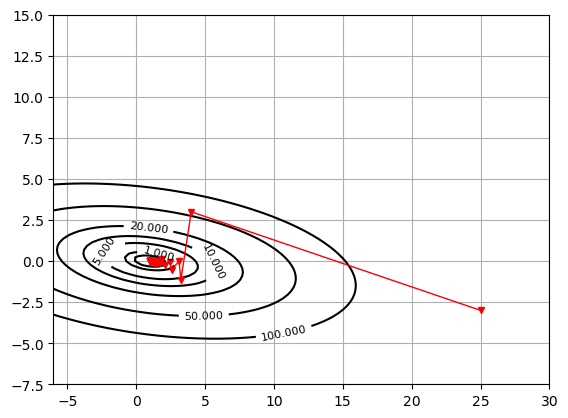

Constant


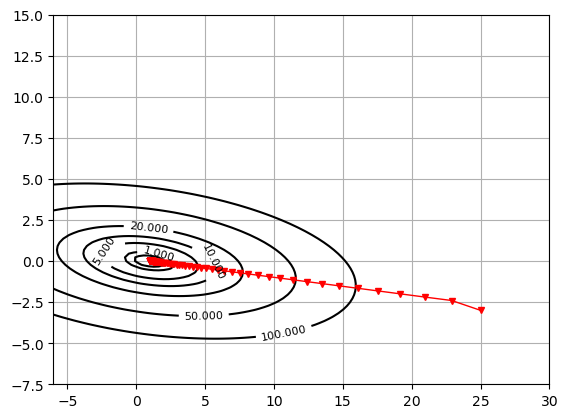

In [4]:
oracle = QuadraticOracle(A=np.array([[1, 1.0], [1.0, 10.0]]), b=np.array([1, 1]))
for x_0 in [np.array([25.0, 5.5]), np.array([5, 5]), np.array([25, -3])]:
    levels = np.array([0.1, 1, 5, 10, 20, 50, 100])
    print(f'Wolfe with x_0 = {x_0}')
    make_experiment(oracle, x_0, levels=levels)
    print('Armijo')
    line_search_tool = get_line_search_tool({"method": 'Armijo', "c1": 1e-4, "alpha_0": 1})
    make_experiment(oracle, x_0, levels=levels, line_search_tool=line_search_tool)
    print('Constant')
    line_search_tool = get_line_search_tool({"method": 'Constant', "c": 1e-1})
    make_experiment(oracle, x_0, levels=levels, line_search_tool=line_search_tool)